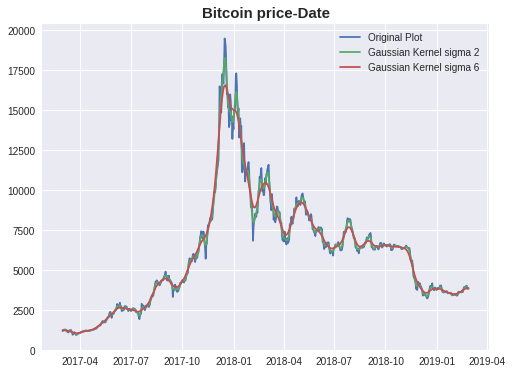

In [4]:
#Question1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d


data = pd.read_csv('BitCoin.csv', names=["date", "price"])
data['date'] = data['date'].apply(lambda x : str(x)[:10])
data['date'] = pd.to_datetime(data['date'])
date = data['date']
price = data['price']

#Display first graph
plt.figure(1, figsize=(8,6))
plt.plot(date,price, label="Original Plot")

#Display smoothing with different Sigma values
for sigma in [2,6]:
  price_filter = gaussian_filter1d(price,sigma)
  plt.plot(date,price_filter, label="Gaussian Kernel sigma "+str(sigma))
plt.title("Bitcoin price-Date", fontsize=15, fontweight="bold")
plt.legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


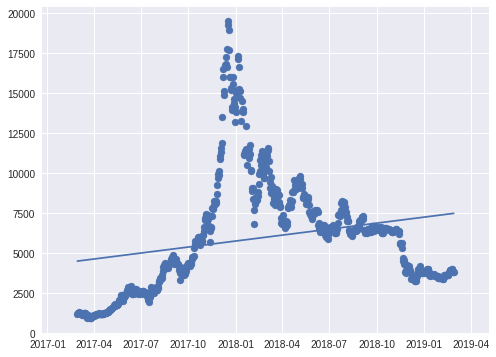

In [15]:
#Question 2
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

#conversion of datetime object to float for regression
float_date = data['date'].apply(lambda x: pd.to_datetime(x).timestamp()) 

linreg = LinearRegression()
linreg.fit(float_date.reshape([-1,1]), price.values.reshape([-1,1]))
predict = linreg.predict(float_date.reshape([-1,1]))
# print('Intercept:', linreg.intercept_)
# print('Coefficients:', linreg.coef_)

# Display scatter and linear line
plt.figure(1,figsize=(8,6))
plt.scatter(date.values.reshape([-1,1]), price)
plt.plot(date.values.reshape([-1,1]), predict)
plt.show()

# Report the SSE, R2 and F-statistic. Report the slope parameter estimate, and its level of significance
f_date = sm.add_constant(float_date)
linear_model = sm.OLS(price, f_date).fit()
# print(linear_model.summary())
# print(linear_model.mse_model * 728/ 10**11)

Question 2 
    
    SSE:   3.96e+11
    R Square: 0.059
    F-Statistics: 45.3
    Slope parameter estimate: 4.7420e-05
    Slope estimate significance: t-score= 6.731

    To comment on the regression model, we can say that the accuracy of the model is very low. This can be shown from the R-Squared score which is less than 0.06. This implies that the model cannot explain the variance of the model more than 6 percent. 
    However the F-statistics is still comparatively high which implies that it is better than the null hypothesis. 
    Since the p-value of the coefficient is nearly equal to zero, we can say that the variable, date in this case, is significantly not equal to zero.

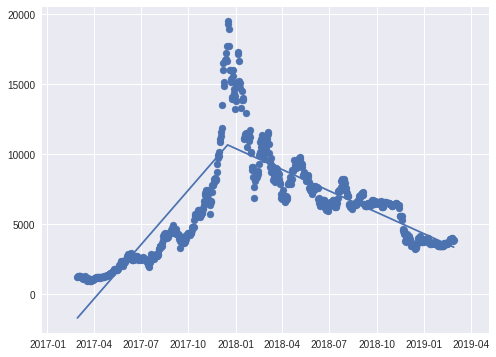

In [16]:
# Question 3
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

def fit_transform(x,knot):
  out = np.zeros((len(x),2))
  tmp = 0
  for i in x:
    if i > knot.timestamp():
        out[tmp,0] = i
        out[tmp,1] = i - knot.timestamp() 
    else:
        out[tmp,0] = i
        out[tmp,1] = 0 
    tmp += 1
  return out
# Generate the relu basis with one knot
# Defined knot
knot = '2017-12-16' 
knot = pd.to_datetime(knot) 
xphi = fit_transform(float_date, knot)

# Plot broken stick regression and actual data
lm = LinearRegression()
lm.fit(xphi,price)
predict = lm.predict(xphi)

plt.figure(1, figsize=(8,6))
plt.scatter(date.values.reshape(-1,1), price)
plt.plot(date, predict)
plt.show()

# Report the SSE, R2 and F-statistic. Report the slope parameter estimates, and their levels of significance.
xphi = sm.add_constant(xphi)
linear_model = sm.OLS(price, xphi).fit()
# print(linear_model.summary())
# print(linear_model.mse_model * 727 /10**12)


Question 3

    SSE:  2.480e+12
    R Square: 0.735
    F-Statistics: 1006
    Slope parameter estimate: 0.0005, -0.0007
    Slope estimate significance: t-score = 44.776, -43.033

    To Comment on the model, we can notice that the R-square score is much higher than the linear regression model. This can be explained by the fact that the knot captures the general trend of the scattered plots.
    Furthermore the F-statistics is high, which implies the result is significant than the null hypothesis.
    Lastly the coefficients of the models are also significantly different from zero as the p-values are nearly zero.

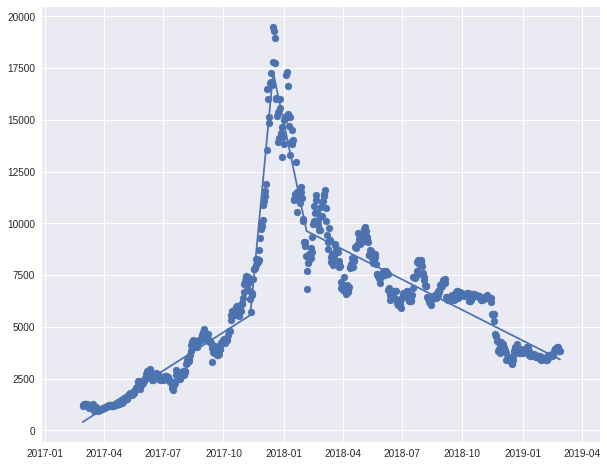

In [17]:
# Question 4 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def multi_knot_transform(dates, knots):
  interval = len(knots) + 1
  f_knots = []
  for knot in knots:  
    f_knots.append(pd.to_datetime(knot).timestamp())
  out = np.zeros((dates.shape[0], interval))
  tmp = 0
  for date in dates:
    out[tmp][0] = date.timestamp()
    for i in range(1,interval): 
      out[tmp][i] = max(0,date.timestamp()- f_knots[i-1])
    tmp += 1
  return out

knots = ['2017-11-11', '2017-12-16', '2018-02-05']
xphi = multi_knot_transform(date, knots)

lm = LinearRegression()
lm.fit(xphi,price)
predict = lm.predict(xphi)
# print(lm.coef_)
# print(lm.intercept_)

# Plot the model
plt.figure(1,figsize=(10,8))
plt.scatter(date.values.reshape(-1,1), price)
plt.plot(date, predict)
plt.show()

# Analysis of model
xphi = sm.add_constant(xphi)
linear_model = sm.OLS(price,xphi).fit()
# print(linear_model.summary())


Question 4

    To comment on the model above, we can notice the R-squre score is 0.945 which implies that the variance is 94 percent explained through the model. Furthermore from the fact that all the coefficients' p-value are nearly equal to zero, we can conclude that the model is effective. 
    
    In terms of the effectiveness of the model, we can say that the knot selection was successful as the regression model captures the macro-trend of the price.

Selected Knots 
2017-11-12
2017-12-10
2017-12-28
2018-01-16
2018-02-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


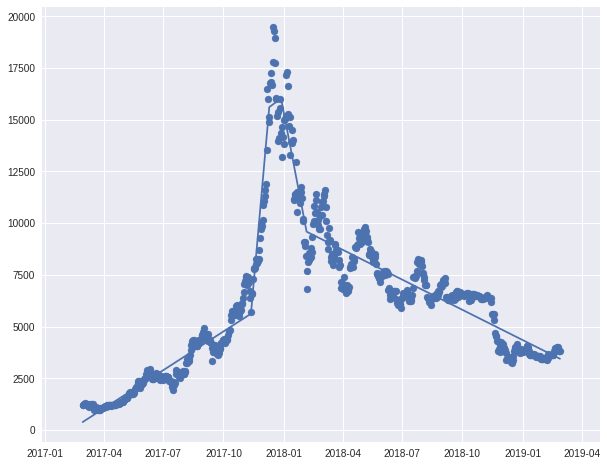

In [18]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def far(date, knots):
# returns true if the date is not too close to the earlier knots
# the definition of 'too close' is a hyperparameter; in the given code it is the variable closeness
# for example if one of the knots are chosen to be Dec 15th and closeness to be 15 then no other dates within 15 days will be chosen 
  out = True
  oneday = 86400.0
  closeness = 18
  date = pd.to_datetime(date).timestamp()
  for knot in knots:
    knot = pd.to_datetime(knot).timestamp()
    if abs(date - knot) < oneday * closeness:
      out = False
      break
  return out
def multi_knot_transform(dates, knots):
# returns a relu basis of knots given
  interval = len(knots) + 1
  f_knots = []
  for knot in knots:  
    f_knots.append(pd.to_datetime(knot).timestamp())
  out = np.zeros((dates.shape[0], interval))
  tmp = 0
  for date in dates:
    date = pd.to_datetime(date).timestamp()
    out[tmp][0] = date 
    for i in range(1,interval): 
      out[tmp][i] = max(0,date- f_knots[i-1])
    tmp += 1
  return out

# Generate a list named approximation which is an approximation of the second order derivative of the function
approximation = []
price_list = data['price'].as_matrix()
data['date'] = data['date'].apply(lambda x : str(x)[:10])
date_list = data['date'].as_matrix()
s = 0
for i in range(1,len(price_list)-1):
  s = price_list[i-1] - 2 * price_list[i] + price_list[i+1] 
  approximation.append([s,date_list[i]])

# Select the five dates with the highest second derivative which implies high variability
approximation.sort(reverse=True,key=lambda x:x[0])
knots = []
for point in approximation:
  if len(knots) == 5:
    break
  elif len(knots) == 0:
    knots.append(point[1])
  elif far(point[1], knots):
    knots.append(point[1])

# Sort and convert knots into string
knots.sort()
knots = [str(knot)[:10] for knot in knots]
print("Selected Knots ")
for knot in knots:
  print(knot)
  
# Apply multi knot transformation from question 4 
xphi = multi_knot_transform(date, knots)
lm = LinearRegression()
lm.fit(xphi,data['price'])
predict = lm.predict(xphi)

# Plot relu basis regression with generated knots
plt.figure(1,figsize=(10,8))
plt.scatter(date.reshape([-1,1]), price)
plt.plot(date, predict)
plt.show()

# Analysis of the model 
xphi = sm.add_constant(xphi)
linear_model = sm.OLS(price,xphi).fit()
# print(linear_model.summary())

Question 5
    
    In order to automatically select the knots, I have generated an approximation of second order derivative of the true-fuction through Richardson extrapolation; the formula is {f(x+h)−2f(x)+f(x−h)}/h^2
        
    With this approximation of second order derivative at each date, I have sorted the list and chose the knots to be not too close to each other. The idea behind this is that the higher the second order derivative the higher the volatility, therefore it includes the most amount of information regarding the trend. In order to ensure that the knots are not too close from each other, I have created a hyperparameter which implies the minimum closeness between two knots.
    
    Through such methodology, when I chose the minimum closeness between the dates to be 18 days, I have acquired a R-squared score of 94 percent. And the coefficients' p-value are no bigger than 0.05.
    